## Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from scipy import stats
import statsmodels.api as sm
import math
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
import pandas.core.algorithms as algos
pd.pandas.set_option('display.max_columns',None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train=pd.read_csv('/content/drive/MyDrive/Deloitte/train.csv')

In [3]:
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [5]:
test=pd.read_csv('/content/drive/MyDrive/Deloitte/test.csv')

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            28913 non-null  int64  
 1   Loan Amount                   28913 non-null  int64  
 2   Funded Amount                 28913 non-null  int64  
 3   Funded Amount Investor        28913 non-null  float64
 4   Term                          28913 non-null  int64  
 5   Batch Enrolled                28913 non-null  object 
 6   Interest Rate                 28913 non-null  float64
 7   Grade                         28913 non-null  object 
 8   Sub Grade                     28913 non-null  object 
 9   Employment Duration           28913 non-null  object 
 10  Home Ownership                28913 non-null  float64
 11  Verification Status           28913 non-null  object 
 12  Payment Plan                  28913 non-null  object 
 13  L

In [7]:
train['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

### Combine train and Test

In [8]:
df=pd.concat([train,test],axis='rows')

In [9]:
df.head(2)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.6267,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0.0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.9210,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96376 entries, 0 to 28912
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            96376 non-null  int64  
 1   Loan Amount                   96376 non-null  int64  
 2   Funded Amount                 96376 non-null  int64  
 3   Funded Amount Investor        96376 non-null  float64
 4   Term                          96376 non-null  int64  
 5   Batch Enrolled                96376 non-null  object 
 6   Interest Rate                 96376 non-null  float64
 7   Grade                         96376 non-null  object 
 8   Sub Grade                     96376 non-null  object 
 9   Employment Duration           96376 non-null  object 
 10  Home Ownership                96376 non-null  float64
 11  Verification Status           96376 non-null  object 
 12  Payment Plan                  96376 non-null  object 
 13  L

### Visualize continous feature

In [11]:
cont_feature=[feature for feature in df.columns if df[feature].dtype!='O']
cont_feature

['ID',
 'Loan Amount',
 'Funded Amount',
 'Funded Amount Investor',
 'Term',
 'Interest Rate',
 'Home Ownership',
 'Debit to Income',
 'Delinquency - two years',
 'Inquires - six months',
 'Open Account',
 'Public Record',
 'Revolving Balance',
 'Revolving Utilities',
 'Total Accounts',
 'Total Received Interest',
 'Total Received Late Fee',
 'Recoveries',
 'Collection Recovery Fee',
 'Collection 12 months Medical',
 'Last week Pay',
 'Accounts Delinquent',
 'Total Collection Amount',
 'Total Current Balance',
 'Total Revolving Credit Limit',
 'Loan Status']

In [12]:
df[cont_feature].nunique()

ID                              96376
Loan Amount                     29737
Funded Amount                   26793
Funded Amount Investor          89848
Term                                4
Interest Rate                   89117
Home Ownership                  89998
Debit to Income                 91895
Delinquency - two years            10
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               24628
Revolving Utilities             89948
Total Accounts                     70
Total Received Interest         96014
Total Received Late Fee         88877
Recoveries                      88961
Collection Recovery Fee         88861
Collection 12 months Medical        2
Last week Pay                     162
Accounts Delinquent                 2
Total Collection Amount          2757
Total Current Balance           83321
Total Revolving Credit Limit    44236
Loan Status                         2
dtype: int64

### Check the nature of decsrete feature

In [13]:
descrete=[feature for feature in df.columns if df[feature].dtype!='O' and df[feature].nunique()<=3000 and feature not in ['Loan Status']]
descrete

## All descrete features make sense that it should be in that order
decsrete=['Delinquency - two years','Collection 12 months Medical']

In [14]:
# for feature in descrete:
#   df[feature]=df[feature].astype(str)

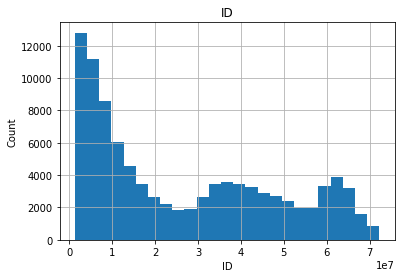

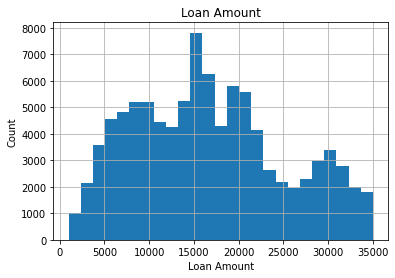

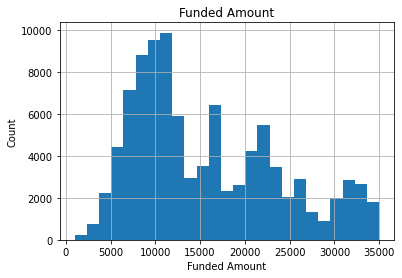

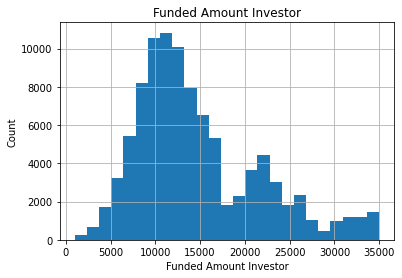

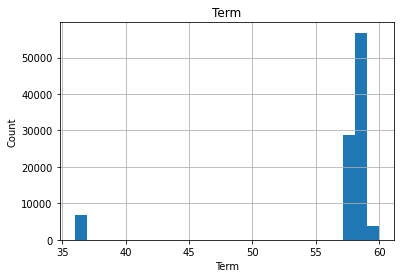

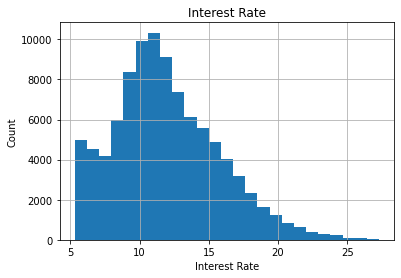

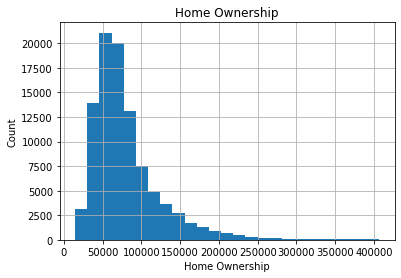

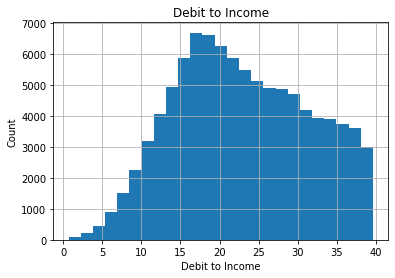

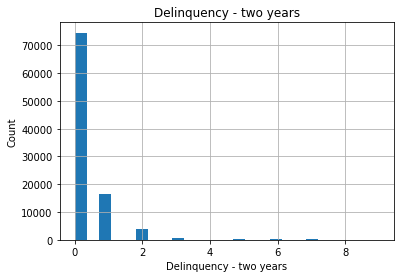

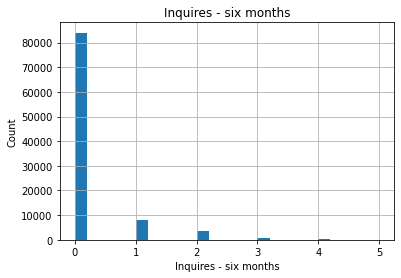

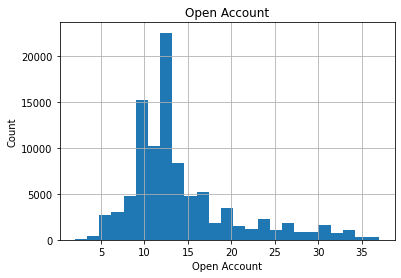

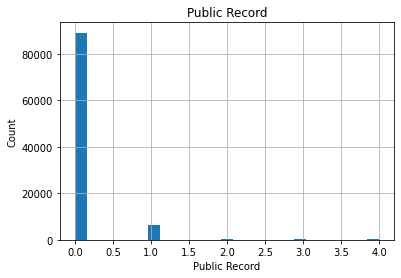

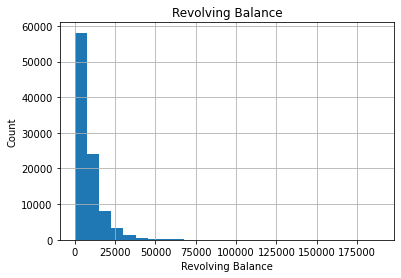

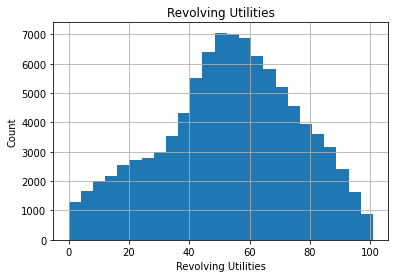

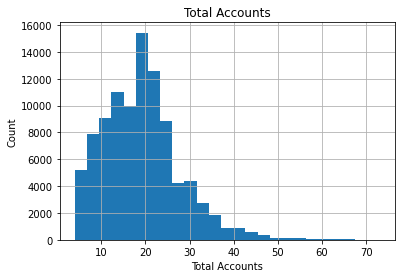

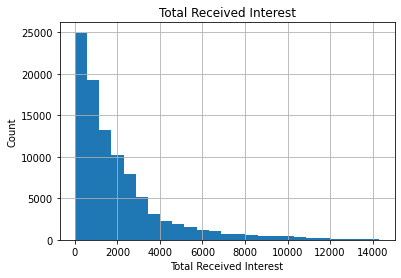

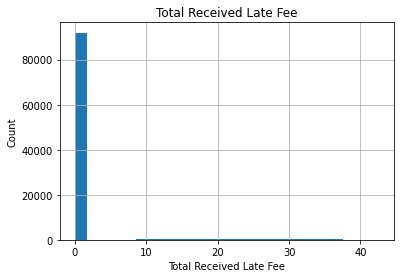

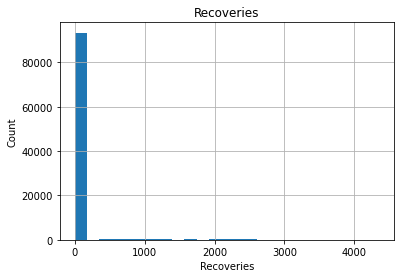

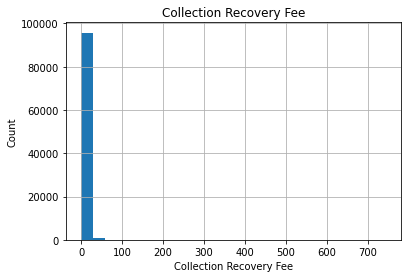

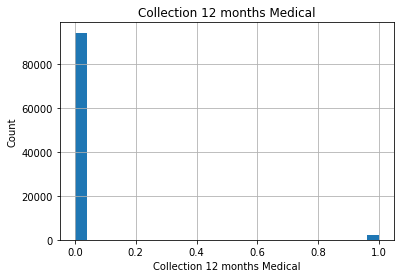

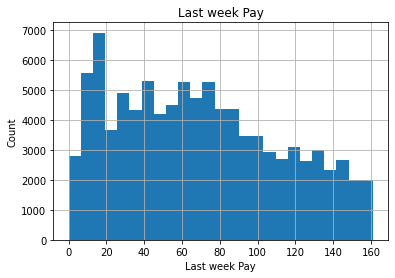

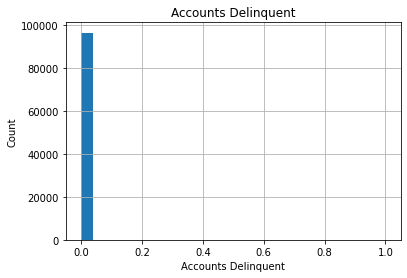

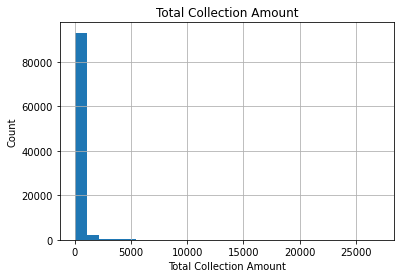

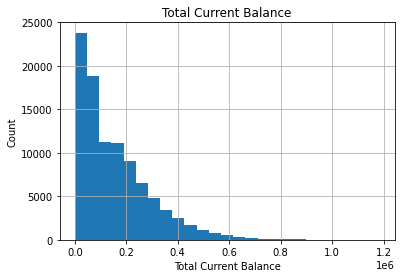

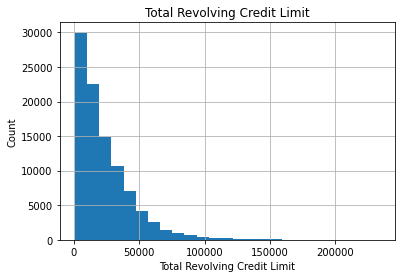

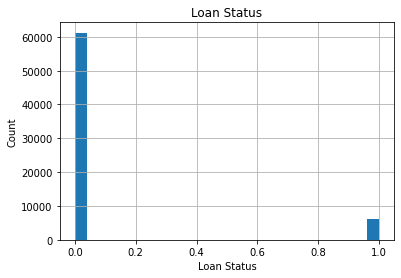

In [15]:
for feature in cont_feature:
  data1=df.copy()
  data1[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

In [16]:
df[cont_feature].nunique()

ID                              96376
Loan Amount                     29737
Funded Amount                   26793
Funded Amount Investor          89848
Term                                4
Interest Rate                   89117
Home Ownership                  89998
Debit to Income                 91895
Delinquency - two years            10
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               24628
Revolving Utilities             89948
Total Accounts                     70
Total Received Interest         96014
Total Received Late Fee         88877
Recoveries                      88961
Collection Recovery Fee         88861
Collection 12 months Medical        2
Last week Pay                     162
Accounts Delinquent                 2
Total Collection Amount          2757
Total Current Balance           83321
Total Revolving Credit Limit    44236
Loan Status                         2
dtype: int64

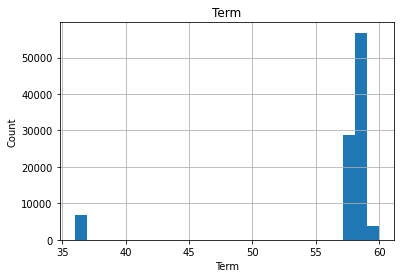

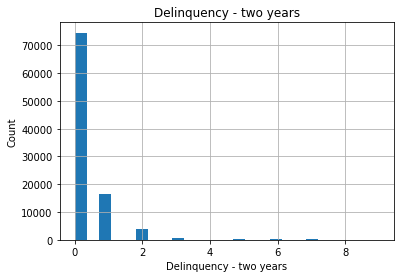

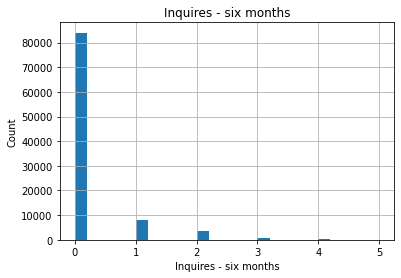

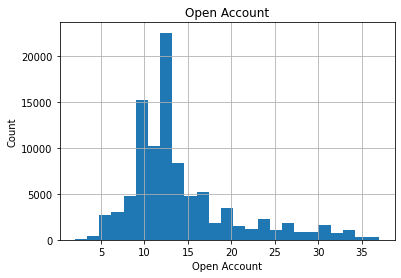

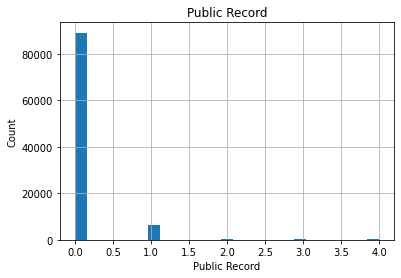

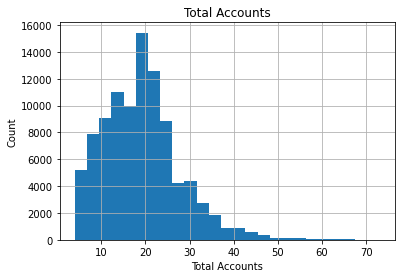

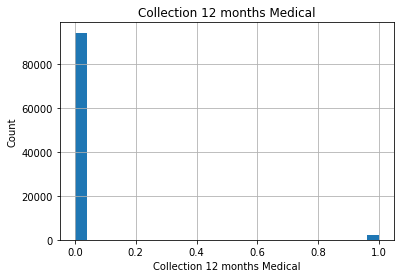

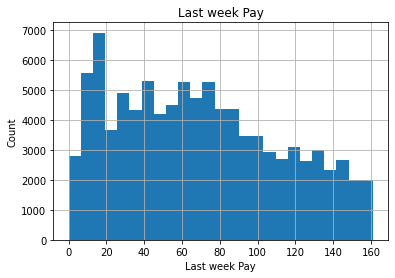

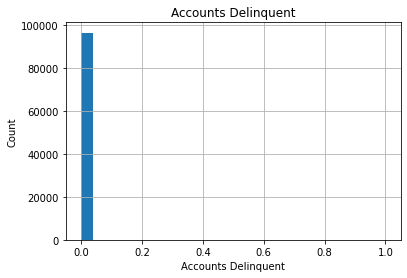

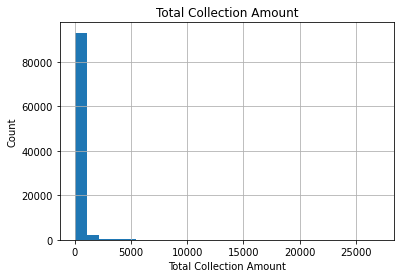

In [17]:
for feature in descrete:
  data1=df.copy()
  data1[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

### Visualize categorical features

In [19]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='O' and feature not in ['ID']]
cat_features

['Batch Enrolled',
 'Grade',
 'Sub Grade',
 'Employment Duration',
 'Verification Status',
 'Payment Plan',
 'Loan Title',
 'Initial List Status',
 'Application Type']

In [20]:
df[cat_features].nunique()

Batch Enrolled          41
Grade                    7
Sub Grade               35
Employment Duration      3
Verification Status      3
Payment Plan             1
Loan Title             109
Initial List Status      2
Application Type         2
dtype: int64

In [21]:
df['Accounts Delinquent'].unique()

array([0, 1])

In [22]:
# df1=df[df['Accounts Delinquent']=="Accounts Delinquent1"]
# df1#['Loan Status'].sum()/df1.shape[0]

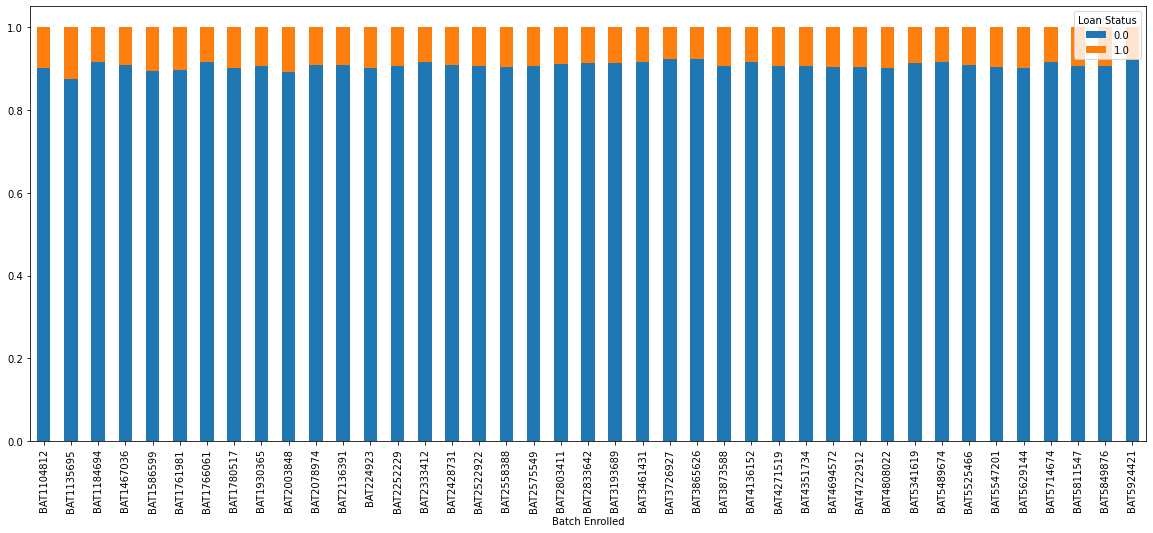

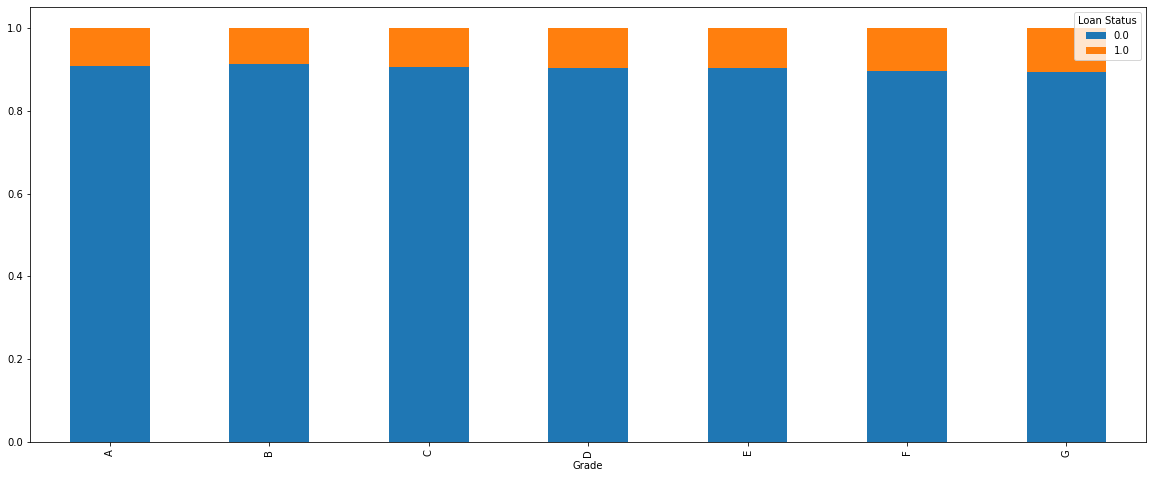

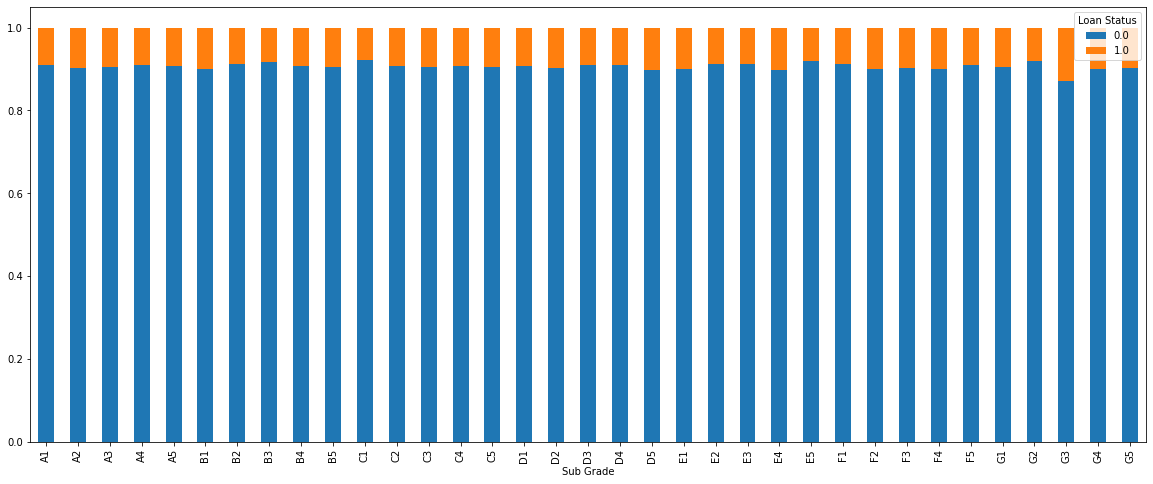

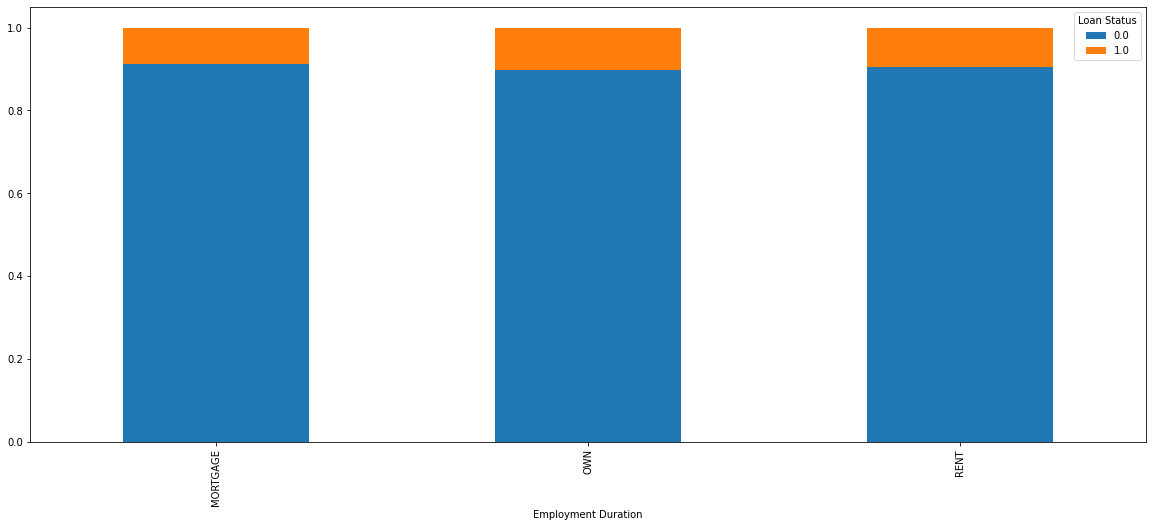

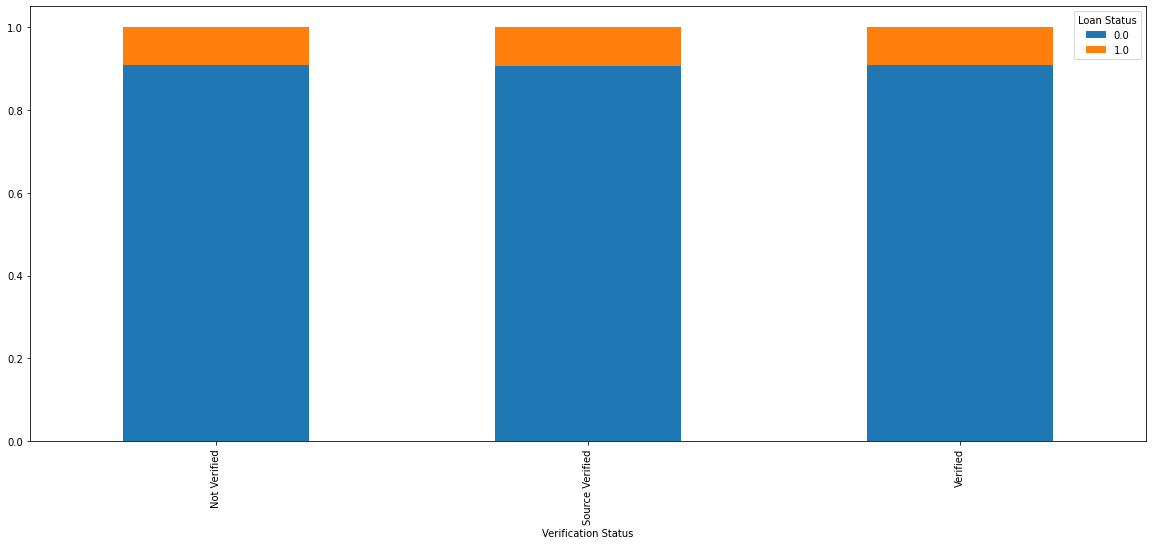

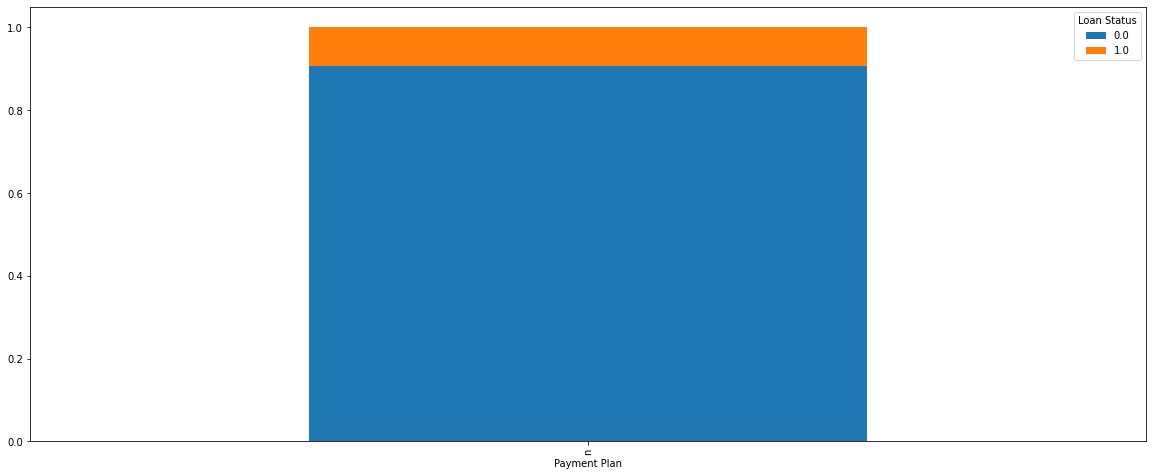

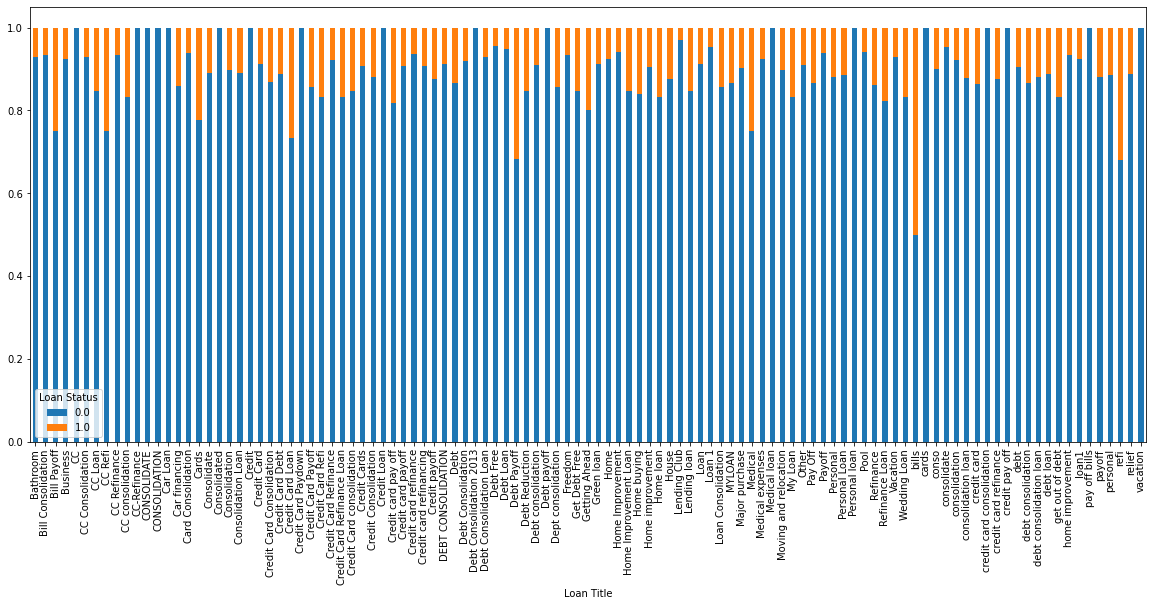

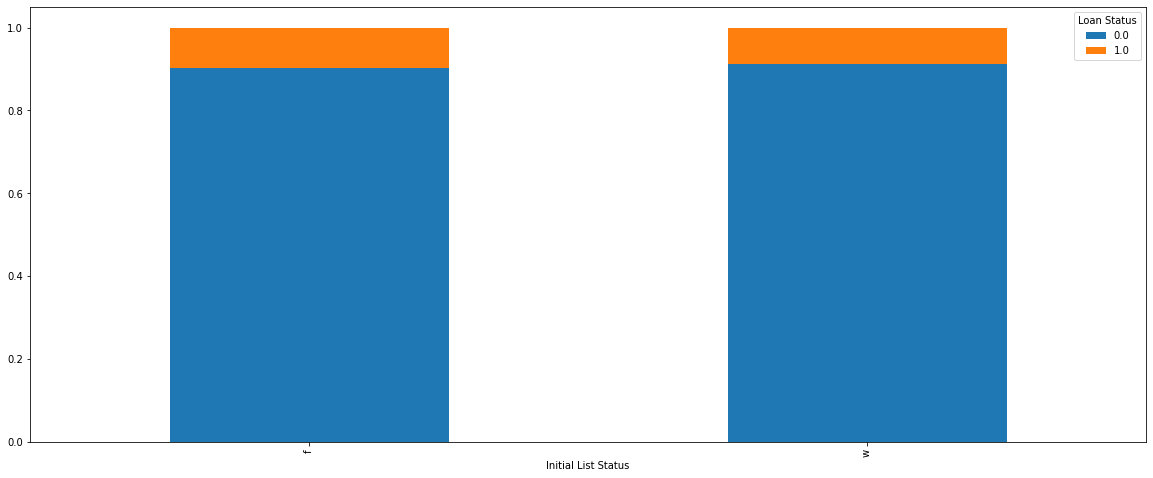

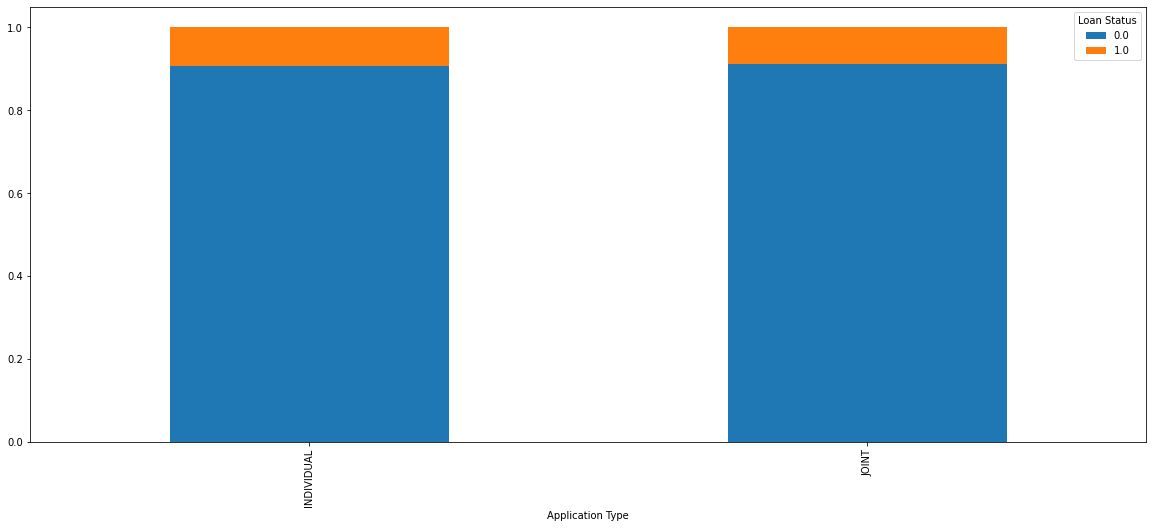

In [23]:
for feature in cat_features:
  data_2=pd.crosstab(df[feature],df['Loan Status'])
  data_2.div(data_2.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(20,8))
  plt.show()

In [24]:
df['Sub Grade']=df['Grade']+df['Sub Grade']
df['ID_new']=df['ID']

In [25]:
df.drop(columns=["Payment Plan","Accounts Delinquent","Grade"],inplace=True)

In [26]:
ID=df[['ID']]

In [27]:
df.drop(columns=["ID"],inplace=True)

In [28]:
df['Batch_Num']=df['Batch Enrolled'].str[3:]

In [29]:
df['Batch_Num']=df['Batch_Num'].astype(int)
# df.head()

In [30]:
A=df['Loan Title'].unique()
A

array(['Debt Consolidation', 'Debt consolidation',
       'Credit card refinancing', 'Home improvement',
       'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'DEBT CONSOLIDATION', 'Home Improvement', 'Refinance',
       'credit card consolidation', 'Lending Club',
       'Debt Consolidation Loan', 'Major purchase', 'Vacation',
       'Business', 'Credit card payoff', 'Credit Card Consolidation',
       'credit card', 'Credit Card Refi', 'Personal Loan', 'CC Refi',
       'consolidate', 'Medical', 'Loan 1', 'Consolidation',
       'Card Consolidation', 'Car financing', 'debt', 'home improvement',
       'debt consolidation', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'Debt', 'cards',
       'Cards', 'Bathroom', 'refi', 'Credit Card Loan',
       'Credit Card Debt', 'House', 'Debt Consolidation 

In [31]:
def loan(x):
  if "ff" in x:
    return 'pay_off'
  elif 'solid' in x:
    return 'conso'
  elif 'efi' in x:
    return 'refinance'
  elif 'CON' in x:
    return 'consol'
  else:
    return x


In [32]:
# df['Loan Title']=df['Loan Title'].apply(loan)

In [33]:
df['Loan Title'].unique()

array(['Debt Consolidation', 'Debt consolidation',
       'Credit card refinancing', 'Home improvement',
       'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'DEBT CONSOLIDATION', 'Home Improvement', 'Refinance',
       'credit card consolidation', 'Lending Club',
       'Debt Consolidation Loan', 'Major purchase', 'Vacation',
       'Business', 'Credit card payoff', 'Credit Card Consolidation',
       'credit card', 'Credit Card Refi', 'Personal Loan', 'CC Refi',
       'consolidate', 'Medical', 'Loan 1', 'Consolidation',
       'Card Consolidation', 'Car financing', 'debt', 'home improvement',
       'debt consolidation', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'Debt', 'cards',
       'Cards', 'Bathroom', 'refi', 'Credit Card Loan',
       'Credit Card Debt', 'House', 'Debt Consolidation 

In [34]:
def loan1(x):
  if "erso" in x:
    return 'personal'
  elif 'ome' in x:
    return 'home'
  elif 'ebt'in x:
    return 'debt'
  else:
    return x

In [35]:
# df['Loan Title']=df['Loan Title'].apply(loan1)

In [36]:
df['Loan Title'].unique()

array(['Debt Consolidation', 'Debt consolidation',
       'Credit card refinancing', 'Home improvement',
       'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'DEBT CONSOLIDATION', 'Home Improvement', 'Refinance',
       'credit card consolidation', 'Lending Club',
       'Debt Consolidation Loan', 'Major purchase', 'Vacation',
       'Business', 'Credit card payoff', 'Credit Card Consolidation',
       'credit card', 'Credit Card Refi', 'Personal Loan', 'CC Refi',
       'consolidate', 'Medical', 'Loan 1', 'Consolidation',
       'Card Consolidation', 'Car financing', 'debt', 'home improvement',
       'debt consolidation', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'Debt', 'cards',
       'Cards', 'Bathroom', 'refi', 'Credit Card Loan',
       'Credit Card Debt', 'House', 'Debt Consolidation 

## Feature Engineering

In [37]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='O' and feature not in ['ID']]
cat_features

['Batch Enrolled',
 'Sub Grade',
 'Employment Duration',
 'Verification Status',
 'Loan Title',
 'Initial List Status',
 'Application Type']

In [38]:
df['Verification Status'].value_counts()

Source Verified    46662
Verified           26059
Not Verified       23655
Name: Verification Status, dtype: int64

In [39]:
clean={'Verification Status':{'Source Verified':1,'Verified':1,'Not Verified':0}}

In [40]:
df=df.replace(clean)

In [41]:
cat_features=[feature for feature in df.columns if df[feature].dtype=='O' and feature not in ['ID']]
cat_features

['Batch Enrolled',
 'Sub Grade',
 'Employment Duration',
 'Loan Title',
 'Initial List Status',
 'Application Type']

In [42]:
for feature in cat_features:
  df[feature]=feature+df[feature]


### Rare Categories

In [43]:
df[cat_features].nunique()

Batch Enrolled          41
Sub Grade              245
Employment Duration      3
Loan Title             109
Initial List Status      2
Application Type         2
dtype: int64

In [44]:
# for feature in cat_features:
#   series=pd.value_counts(df[feature])
#   mask = (series/series.sum() * 100).lt(0.025)
#   df[feature] = np.where(df[feature].isin(series[mask].index),feature+'Rare_Var',df[feature])

In [45]:
df[cat_features].nunique()

Batch Enrolled          41
Sub Grade              245
Employment Duration      3
Loan Title             109
Initial List Status      2
Application Type         2
dtype: int64

In [46]:
# df.drop(columns=['ID_new'],inplace=True)

### Distinguising categorical features with more and less categories✈

In [47]:
low_features=[feature for feature in df.columns if df[feature].dtype=='O' and df[feature].nunique()<=10]
low_features

['Employment Duration', 'Initial List Status', 'Application Type']

In [48]:
high_features=[feature for feature in df.columns if df[feature].dtype=='O' and df[feature].nunique()>10]
high_features=['Batch Enrolled', 'Sub Grade']

### Target guided mean encoding technique

In [49]:
for feature in high_features:
  cat_labels=df.groupby([feature])['Loan Status'].mean().sort_values().index
  cat_lables2={k:i for i,k in enumerate(cat_labels,0)}
  df[feature]=df[feature].map(cat_lables2)

### Count based label encoding

In [50]:
low_features=['Employment Duration','Application Type']

In [51]:
for feature in low_features:
  dic=df[feature].value_counts().to_dict()
  list1=np.arange(len(dic.values()),0,-1)
  dic2=dict(zip(list(dic.keys()),list1))
  df[feature]=df[feature].replace(dic2)

### Normal Label Encoding

In [52]:
categorical_features=['Loan Title']

In [53]:
labelencoder=LabelEncoder()
for var in categorical_features:
  df[var]=labelencoder.fit_transform(df[var])

In [54]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O' and feature not in ['ID']]


### One Hot

In [55]:
def category_onehot_multcols(multcolumns):
    df_final=df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(df[fields],drop_first=True)
        
        df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

In [56]:
# for i in categorical_features:
#   print(df[i].value_counts())

In [57]:
df=category_onehot_multcols(categorical_features)

Initial List Status


In [58]:
df.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,ID_new,Batch_Num,Initial List Statusw
0,10000,32236,12329.36286,59,27,11.135007,36,3,176346.62670,0,42,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,2,49,31,311301,6619,0.0,65087372,2522922,1
1,3609,11940,12191.99692,59,38,12.237563,104,2,39833.92100,1,49,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,2,109,53,182610,20885,0.0,1450153,1586599,0
2,28276,9311,21603.22455,59,17,12.545884,198,3,91506.69105,1,42,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,2,66,34,89801,26155,0.0,1969101,2136391,1
3,11170,6954,17877.15585,59,18,16.731201,152,3,108286.57590,1,49,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,2,39,40,9189,60214,0.0,6651430,2428731,1
4,16890,13226,13539.92667,59,12,15.008300,184,3,44234.82545,1,38,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,2,18,430,126029,22579,0.0,14354669,5341619,1


In [59]:
fea=['Loan Amount','Funded Amount Investor','Funded Amount','Home Ownership','Revolving Balance',
     'Total Current Balance','Total Revolving Credit Limit','Batch_Num','ID_new']

In [60]:
for feature in fea:
  df[feature]=np.log1p(df[feature])

In [61]:
# for feature in fea:
#   data1=df.copy()
#   data1[feature].hist(bins=25)
#   plt.xlabel(feature)
#   plt.ylabel("Count")
#   plt.title(feature)
#   plt.show()

# Scaling

In [62]:
scale_features=[feature for feature in df.columns if feature not in ['Employment Duration','Loan Title','Application Type','Loan Status']]
scale_features=scale_features#[:17]
scale_features

['Loan Amount',
 'Funded Amount',
 'Funded Amount Investor',
 'Term',
 'Batch Enrolled',
 'Interest Rate',
 'Sub Grade',
 'Home Ownership',
 'Verification Status',
 'Debit to Income',
 'Delinquency - two years',
 'Inquires - six months',
 'Open Account',
 'Public Record',
 'Revolving Balance',
 'Revolving Utilities',
 'Total Accounts',
 'Total Received Interest',
 'Total Received Late Fee',
 'Recoveries',
 'Collection Recovery Fee',
 'Collection 12 months Medical',
 'Last week Pay',
 'Total Collection Amount',
 'Total Current Balance',
 'Total Revolving Credit Limit',
 'ID_new',
 'Batch_Num',
 'Initial List Statusw']

In [63]:
scaler=StandardScaler()
df[scale_features]=scaler.fit_transform(df[scale_features])

# Data Selection for Training, Validation, & Testing

In [64]:
pred_features=['Loan Status']

In [65]:
df_train=df.iloc[:train.shape[0],:]
df_test=df.iloc[train.shape[0]:,:]

In [66]:
df_test=df_test.drop(columns=pred_features)
df_train.head(2)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,ID_new,Batch_Num,Initial List Statusw
0,-0.575971,1.568956,-0.133835,0.324817,0.612491,-0.215214,-1.583440,3,1.868315,-1.753349,42,-0.782237,0.832662,-0.342143,-0.175149,-0.250915,1.333216,0.961513,-1.385279,0.413737,-0.191056,-0.155194,-0.046842,-0.145686,2,-0.470696,-0.149638,1.078358,-0.921330,0.0,1.242848,-0.164475,0.920956
1,-2.228780,-0.244438,-0.157349,0.324817,1.576231,0.076418,-0.224707,2,-1.184832,0.570337,49,-0.884505,-0.407542,-0.342143,-0.336484,-0.250915,-1.515865,1.110242,-0.701704,-0.571202,-0.203957,-0.155539,-0.026244,-0.145686,2,0.919390,-0.122078,0.564607,0.283346,0.0,-2.239319,-0.974678,-1.085828


In [67]:
train_features=[feature for feature in df.columns if feature not in pred_features]

In [68]:
X_train=df_train.drop(columns=pred_features)
y_train=df_train[pred_features]

In [69]:
X_train,x_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size = 0.1,random_state=1)

In [70]:
print(X_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(60716, 32)
(6747, 32)
(60716, 1)
(6747, 1)


In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [72]:
reg_log = sm.Logit(y_train, X_train)
results_log = reg_log.fit()
results_log.summary2()

Optimization terminated successfully.
         Current function value: 0.305990
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                  Logit                Pseudo R-squared:     0.007     
Dependent Variable:     Loan Status          AIC:                  37220.9999
Date:                   2022-02-25 05:17     BIC:                  37509.4467
No. Observations:       60716                Log-Likelihood:       -18578.   
Df Model:               31                   LL-Null:              -18708.   
Df Residuals:           60684                LLR p-value:          7.3924e-38
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         6.0000                                               
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------
Loan Amount                  -0.0264   0.0140  -1.8897 0.0588 -0.0539  0.0010
Funded Amount                 0.0003   0.0143   0.0220 0.9825 -0.0278  0.0284
Funded Amount Investor       -0.0186   0.0146  -1.2787 0.2010 -0.0471  0.0099
Term                         -0.0198   0.0242  -0.8172 0.4138 -0.0671  0.0276
Batch Enrolled                0.0888   0.0148   5.9981 0.0000  0.0598  0.1179
Interest Rate                 0.0141   0.0142   0.9920 0.3212 -0.0138  0.0420
Sub Grade                     0.1804   0.0139  13.0250 0.0000  0.1533  0.2076
Employment Duration          -0.0673   0.0207  -3.2549 0.0011 -0.1079 -0.0268
Home Ownership                0.0046   0.0141   0.3232 0.7465 -0.0231  0.0322
Verification Status           0.0161   0.0143   1.1232 0.2614 -0.0120  0.0441
Loan Title                   -0.0005   0.0013  -0.3820 0.7025 -0.0030  0.0020
Debit to Income              -0.0080   0.0142  -0.5662 0.5712 -0.0358  0.0198
Delinquency - two years       0.0272   0.0133   2.0487 0.0405  0.0012  0.0533
Inquires - six months         0.0036   0.0159   0.2273 0.8202 -0.0275  0.0348
Open Account                 -0.0195   0.0142  -1.3684 0.1712 -0.0473  0.0084
Public Record                 0.0233   0.0136   1.7119 0.0869 -0.0034  0.0499
Revolving Balance             0.0101   0.0143   0.7041 0.4814 -0.0179  0.0381
Revolving Utilities           0.0073   0.0141   0.5204 0.6028 -0.0203  0.0350
Total Accounts               -0.0060   0.0149  -0.4024 0.6874 -0.0351  0.0232
Total Received Interest       0.0056   0.0137   0.4070 0.6840 -0.0213  0.0325
Total Received Late Fee       0.0294   0.0128   2.2959 0.0217  0.0043  0.0545
Recoveries                   -0.0047   0.0139  -0.3376 0.7357 -0.0319  0.0225
Collection Recovery Fee      -0.0505   0.0387  -1.3045 0.1921 -0.1264  0.0254
Collection 12 months Medical -0.0079   0.0141  -0.5591 0.5761 -0.0354  0.0197
Application Type             -1.0568   0.0385 -27.4531 0.0000 -1.1322 -0.9813
Last week Pay                 0.0123   0.0140   0.8776 0.3801 -0.0152  0.0397
Total Collection Amount       0.0283   0.0129   2.1962 0.0281  0.0030  0.0535
Total Current Balance         0.0309   0.0145   2.1409 0.0323  0.0026  0.0593
Total Revolving Credit Limit  0.0131   0.0140   0.9369 0.3488 -0.0144  0.0407
ID_new                       -0.0067   0.0140  -0.4831 0.6290 -0.0341  0.0206
Batch_Num                    -0.0015   0.0146  -0.1031 0.9179 -0.0301  0.0271
Initial List Statusw         -0.0402   0.0141  -2.8448 0.0044 -0.0679 -0.0125
=============================================================================

"""

# Models

## XGBoost

In [73]:
from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import StratifiedKFold

xgb1=XGBClassifier(base_score=0.75, booster='gblinear', colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=1,importance_type='gain',
                   interaction_constraints='',learning_rate=0.2, max_delta_step=0, max_depth=7, 
                   min_child_weight=5, missing=None, monotone_constraints='(1,-1)', n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0, 
                   reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact', validate_parameters=1, verbosity=3)

In [74]:
xgb1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.75, booster='gblinear', colsample_bylevel=0.5,
              colsample_bytree=0.5, gamma=0.1, gpu_id=1,
              interaction_constraints='', learning_rate=0.2, max_depth=7,
              min_child_weight=5, monotone_constraints='(1,-1)',
              n_estimators=500, n_jobs=4, num_parallel_tree=1,
              tree_method='exact', validate_parameters=1, verbosity=3)

### Hyper parameter tuning

In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

def timer(start_time=None):
  if not start_time:
    start_time = datetime.now()
    return start_time
  elif start_time:
    thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
train_x=X_train[:10000]
train_y=y_train[:10000]

In [ ]:
random_search=RandomizedSearchCV(estimator=xgb1,param_distributions=hyperparameter_grid,n_iter=10,
                                 scoring='neg_log_loss',n_jobs=5,cv=5,verbose=5,
                                 return_train_score = True,random_state=42)

from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(train_x,train_y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 7


 Time taken: 0 hours 2 minutes and 39.05 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.75, booster='gblinear', colsample_bylevel=0.5,
              colsample_bytree=0.5, gamma=0.1, gpu_id=1,
              interaction_constraints='', max_depth=10, min_child_weight=2,
              monotone_constraints='(1,-1)', n_estimators=1500, n_jobs=4,
              num_parallel_tree=1, tree_method='exact', validate_parameters=1,
              verbosity=3)

In [ ]:
xgb1=random_search.best_estimator_
xgb1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18:59:17] ======== Monitor: Learner ========
[18:59:17] GetGradient: 1.02473s, 1500 calls @ 683us
[18:59:17] PredictRaw: 0.0141532s, 1500 calls @ 9us
[18:59:17] UpdateOneIter: 7.03232s, 1500 calls @ 4688us
[18:59:17] ======== Monitor: GBLinear ========
[18:59:17] DoBoost: 5.98779s, 1500 calls @ 3991us
[18:59:17] PredictBatch: 0.0128926s, 1500 calls @ 8us
[18:59:17] PredictBatchInternal: 3.46815s, 1501 calls @ 2310us


XGBClassifier(base_score=0.75, booster='gblinear', colsample_bylevel=0.5,
              colsample_bytree=0.5, gamma=0.1, gpu_id=1,
              interaction_constraints='', max_depth=10, min_child_weight=2,
              monotone_constraints='(1,-1)', n_estimators=1500, n_jobs=4,
              num_parallel_tree=1, tree_method='exact', validate_parameters=1,
              verbosity=3)

In [75]:
y_pred_prob1 = xgb1.predict_proba(X_train)[:,1]
y_pred_test1 = xgb1.predict_proba(df_test)[:,1]
y_pred_valid1 = xgb1.predict_proba(x_valid)[:,1]

## Random Forests

In [76]:
from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf = RandomForestClassifier(bootstrap=False, max_depth=4, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=341)
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=False, max_depth=4, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=341)

### hyper parameter tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 25, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [ ]:
random_grid = {'n_estimators': n_estimators,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [25, 77, 130, 183, 236, 288, 341, 394, 447, 500], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
n_iter = 10,scoring='neg_log_loss', cv = 5, verbose=500, random_state=42, n_jobs = 5)

In [ ]:
rf_random.fit(train_x, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    max_depth=4,
                                                    max_features='sqrt',
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    n_estimators=341),
                   n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 77, 130, 183, 236,
                                                         288, 341, 394, 447,
   

In [ ]:
rf=rf_random.best_estimator_
rf

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=77)

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=77)

In [77]:
y_pred_valid2 = rf.predict_proba(x_valid)[:,1]
y_pred_prob2 = rf.predict_proba(X_train)[:,1]
y_pred_test2 = rf.predict_proba(df_test)[:,1]

## CatBoost

In [78]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [79]:
df2=pd.concat([ID,df],axis='columns')

In [80]:
Train=df2.iloc[:train.shape[0],:]
# Train.head()

In [81]:
features=[feature for feature in df2.columns if feature not in pred_features+['ID']]

In [82]:
from sklearn.tree import DecisionTreeClassifier
import random
from catboost import CatBoostClassifier

In [83]:
clf = CatBoostClassifier(
    iterations=2500,
    eval_metric = 'Logloss',
    learning_rate = 0.02,
    verbose=500,
)

random.seed(2)
dev_ids = random.sample(Train['ID'].to_list(), train.shape[0]-10000)
dev = Train[Train.ID.isin(dev_ids)]
val = Train[Train.ID.isin(dev_ids) == False]

clf.fit(
    dev[features], dev['Loan Status'],
    eval_set=(val[features], val['Loan Status']),
)

0:	learn: 0.6746916	test: 0.6746325	best: 0.6746325 (0)	total: 74.6ms	remaining: 3m 6s
500:	learn: 0.2956082	test: 0.3003724	best: 0.3003665 (497)	total: 21.4s	remaining: 1m 25s
1000:	learn: 0.2830592	test: 0.3008588	best: 0.3003665 (497)	total: 47.6s	remaining: 1m 11s
1500:	learn: 0.2714858	test: 0.3013460	best: 0.3003665 (497)	total: 58s	remaining: 38.6s
2000:	learn: 0.2603472	test: 0.3020294	best: 0.3003665 (497)	total: 1m 8s	remaining: 17.1s
2499:	learn: 0.2497800	test: 0.3029183	best: 0.3003665 (497)	total: 1m 19s	remaining: 0us

bestTest = 0.3003665484
bestIteration = 497

Shrink model to first 498 iterations.


In [84]:
y_pred_valid3 = clf.predict_proba(x_valid)[:,1]
y_pred_prob3 = clf.predict_proba(X_train)[:,1]
y_pred_test3 = clf.predict_proba(df_test)[:,1]

## Logistic Regression

In [85]:
lg=LogisticRegression(fit_intercept=False, C=1e-3,penalty='l2')
lg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, fit_intercept=False)

In [86]:
y_pred_valid4 = lg.predict_proba(x_valid)[:,1]

y_pred_prob4 = lg.predict_proba(X_train)[:,1]
y_pred_test4 = lg.predict_proba(df_test)[:,1]

In [87]:
sum(y_pred_test4)

2826.9651614169425

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GRB = GradientBoostingClassifier(max_depth=4, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=341)
GRB.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2,
                           min_samples_split=5, n_estimators=341)

In [ ]:
y_pred_valid6 = GRB.predict_proba(x_valid)[:,1]

y_pred_prob6 = GRB.predict_proba(X_train)[:,1]
y_pred_test6 = GRB.predict_proba(df_test)[:,1]

### Hyper parameter tuning

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 400, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 8, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

In [ ]:
random_grid = {'n_estimators': n_estimators,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
# 'bootstrap': bootstrap
}
print(random_grid)

{'n_estimators': [50, 68, 86, 105, 123, 142, 160, 178, 197, 215, 234, 252, 271, 289, 307, 326, 344, 363, 381, 400], 'max_depth': [2, 3, 4, 5, 6, 8, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
GRB=GradientBoostingClassifier()
grb_random = RandomizedSearchCV(estimator = GRB, param_distributions = random_grid,
n_iter = 15,scoring='neg_log_loss', cv = 3, verbose=500, random_state=42, n_jobs = 5)

In [ ]:
grb_random.fit(train_x, train_y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=15,
                   n_jobs=5,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 8, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 68, 86, 105, 123,
                                                         142, 160, 178, 197,
                                                         215, 234, 252, 271,
                                                         289, 307, 326, 344,
                                                         363, 381, 400]},
                   random_state=42, scoring='neg_log_loss', verbose=500)

In [ ]:
GRB=grb_random.best_estimator_
GRB

GradientBoostingClassifier(max_depth=2, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=68)

In [ ]:
GRB.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=2, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=68)

In [ ]:
y_pred_valid6 = GRB.predict_proba(x_valid)[:,1]

y_pred_prob6 = GRB.predict_proba(X_train)[:,1]
y_pred_test6 = GRB.predict_proba(df_test)[:,1]

## ANNS

In [88]:
# !pip install tensforflow
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(25, input_dim=X_train.shape[1], kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='he_uniform', activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(16,  kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12,  kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(64,  kernel_initializer='he_uniform', activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(75,  kernel_initializer='he_uniform', activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(50,  kernel_initializer='he_uniform', activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1,  kernel_initializer='he_uniform', activation='sigmoid'))

In [ ]:
sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6,momentum=0.9, nesterov=True)

In [ ]:
model.compile(loss= "binary_crossentropy",optimizer=sgd,metrics=['accuracy'])

model_history=model.fit(np.array(X_train), y_train, batch_size=20, epochs=20)

Epoch 1/20
3036/3036 [==============================] - 6s 2ms/step - loss: 0.3143 - accuracy: 0.9075
Epoch 2/20
3036/3036 [==============================] - 6s 2ms/step - loss: 0.3084 - accuracy: 0.9076
Epoch 3/20
3036/3036 [==============================] - 6s 2ms/step - loss: 0.3082 - accuracy: 0.9076
Epoch 4/20
3036/3036 [==============================] - 6s 2ms/step - loss: 0.3083 - accuracy: 0.9076
Epoch 5/20
3036/3036 [==============================] - 6s 2ms/step - loss: 0.3082 - accuracy: 0.9076
Epoch 6/20
3036/3036 [==============================] - 6s 2ms/step - loss: 0.3083 - accuracy: 0.9076
Epoch 7/20
3036/3036 [==============================] - 6s 2ms/step - loss: 0.3082 - accuracy: 0.9076
Epoch 8/20
3036/3036 [==============================] - 6s 2ms/step - loss: 0.3083 - accuracy: 0.9076
Epoch 9/20
3036/3036 [==============================] - 6s 2ms/step - loss: 0.3082 - accuracy: 0.9076
Epoch 10/20
3036/3036 [==============================] - 6s 2ms/step - loss: 0.308

In [ ]:
y_pred_prob5=model.predict(X_train)
y_pred_prob5=np.array(y_pred_prob5[:,0])

In [ ]:
y_pred_test5=np.array(model.predict(np.array(df_test)))[:,0]
y_pred_valid5=np.array(model.predict(x_valid))[:,0]

In [ ]:
y_pred_prob=y_pred_prob5
y_pred_test=y_pred_test5
y_pred_valid=y_pred_valid5

In [ ]:
print(log_loss(y_train, y_pred_prob))
log_loss(y_valid, y_pred_valid)

0.30809023430414134


0.3099199781859382

## SVC 

In [ ]:
from sklearn.svm import SVC
svm_clf=SVC(gamma="auto", random_state=42)

In [ ]:
# svm_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# y_pred_prob7=svm_clf.predict(X_train)
# y_pred_valid7=svm_clf.predict(x_valid)
# y_pred_test7=svm_clf.predict(df_test)

# Stacking Models

In [ ]:
a=np.arange(0,1.1,0.1)
b=np.arange(0,1.1,0.1)
c=np.arange(0,1.1,0.1)
d=np.arange(0,1.1,0.1)
e=np.arange(0,1.1,0.1)
f=np.arange(0,1.1,0.1)


In [ ]:
S_T=[]
S_V=[]
A=[]
B=[]
C=[]  
D=[]
E=[]
for i in range(len(a)):
  for j in range(len(b)):
    for k in range(len(c)):
      for l in range(len(d)):
        for m in range(len(e)):
          if a[i]+b[j]+c[k]+d[l]+e[m]==1:
            # print(a[i],b[j],c[k],d[l],e[m])
            y_comb_valid=a[i]*y_pred_valid1+b[j]*y_pred_valid2+c[k]*y_pred_valid3+d[l]*y_pred_valid4+e[m]*y_pred_valid6
            y_comb_train=a[i]*y_pred_prob1+b[j]*y_pred_prob2+c[k]*y_pred_prob3+d[l]*y_pred_prob4+e[m]*y_pred_prob6

            # precisions, recalls, thresholds = precision_recall_curve(y_valid, y_comb_valid)
            # # fpr, tpr, threshold = metrics.roc_curve(y_train, y_comb_train)
            # cutoff = f1_cutoff(precisions, recalls, thresholds)

            # predicted = pd.DataFrame()
            # predicted["pred"] = y_comb_train
            # predicted["pred"] = np.where(predicted["pred"] > float(cutoff), 1, 0)

            # pred_valid = pd.DataFrame()
            # pred_valid["pred"] = y_comb_valid
            # pred_valid["pred"] = np.where(pred_valid["pred"] > float(cutoff), 1, 0)
            log_loss(y_train, y_pred_prob)

            score_train=log_loss(y_train, y_comb_train)
            score_valid=log_loss(y_valid, y_comb_valid)
            S_T.append(score_train)
            S_V.append(score_valid)
            A.append(a[i])
            B.append(b[j])
            C.append(c[k])
            D.append(d[l])
            E.append(e[m])

S_T=np.array(S_T)
S_V=np.array(S_V)
A=np.array(A)
B=np.array(B)
C=np.array(C)
D=np.array(D)
E=np.array(E)

S_T=pd.DataFrame(S_T,columns=['log_loss_TRAIN'])
S_V=pd.DataFrame(S_V,columns=['log_loss_VALID'])
A=pd.DataFrame(A,columns=['XG_Coeff'])
B=pd.DataFrame(B,columns=['RF_Coeff'])
C=pd.DataFrame(C,columns=['CAT_Coeff'])
D=pd.DataFrame(D,columns=['LG_Coeff'])
E=pd.DataFrame(E,columns=['GRB_Coeff'])


dff=pd.concat([A,B,C,D,E,S_T,S_V],axis='columns')
dff['comb']=dff['log_loss_TRAIN']+dff['log_loss_VALID']

In [ ]:
dff.sort_values(by='log_loss_VALID',ascending=True,inplace=True)
dff.head(10)

,XG_Coeff,RF_Coeff,CAT_Coeff,LG_Coeff,GRB_Coeff,log_loss_TRAIN,log_loss_VALID,comb
61,0.0,0.0,1.0,0.0,0.0,0.278925,0.282015,0.560940
60,0.0,0.0,0.9,0.1,0.0,0.279939,0.283037,0.562977
309,0.1,0.0,0.9,0.0,0.0,0.279624,0.283201,0.562825
59,0.0,0.0,0.9,0.0,0.1,0.279954,0.283310,0.563264
113,0.0,0.1,0.9,0.0,0.0,0.279253,0.283578,0.562831
58,0.0,0.0,0.8,0.2,0.0,0.280992,0.284100,0.565092
308,0.1,0.0,0.8,0.1,0.0,0.280657,0.284247,0.564903
57,0.0,0.0,0.8,0.1,0.1,0.280989,0.284356,0.565345
495,0.2,0.0,0.8,0.0,0.0,0.280351,0.284423,0.564774
307,0.1,0.0,0.8,0.0,0.1,0.280681,0.284531,0.565212


In [ ]:
# a,b,c,d,e,f=0.15,0.15,0.15,0.2,0.2,0.15 

## Combining Model predictions
### Sometimes this work well and rank in the private leaderboard would be better due to generalization

In [89]:
# # Random Forests
y_pred_prob=y_pred_prob2
y_pred_test=y_pred_test2
y_pred_valid=y_pred_valid2

# # XBG
y_pred_prob=y_pred_prob1
y_pred_test=y_pred_test1
y_pred_valid=y_pred_valid1

# # CatBoost
y_pred_prob=y_pred_prob3
y_pred_test=y_pred_test3
y_pred_valid=y_pred_valid3

# # LG
# y_pred_prob=y_pred_prob4
# y_pred_test=y_pred_test4
# y_pred_valid=y_pred_valid4

# # ANN
# y_pred_prob=y_pred_prob5
# y_pred_test=y_pred_test5
# y_pred_valid=y_pred_valid5

# # GRB
# y_pred_prob=y_pred_prob6
# y_pred_test=y_pred_test6
# y_pred_valid=y_pred_valid6

# y_pred_prob=0.5*y_pred_prob6+0.5*y_pred_prob3
# y_pred_test=0.5*y_pred_test6+0.5*y_pred_test3
# y_pred_valid=0.5*y_pred_valid6+0.5*y_pred_valid3

# ##
# y_pred_prob=0.25*y_pred_prob1+0.25*y_pred_prob3+0.25*y_pred_prob6+0.25*y_pred_prob4
# y_pred_test=0.25*y_pred_test1+0.25*y_pred_test3+0.25*y_pred_test6+0.25*y_pred_test4
# y_pred_valid=0.25*y_pred_valid1+0.25*y_pred_valid3+0.25*y_pred_valid6+0.25*y_pred_valid4

# y_pred_prob=a*y_pred_prob1+b*y_pred_prob2+c*y_pred_prob3 +d*y_pred_prob5+e*y_pred_prob6
# y_pred_test=a*y_pred_test1+b*y_pred_test2+c*y_pred_test3 +d*y_pred_test5+e*y_pred_test6
# y_pred_valid=a*y_pred_valid1+b*y_pred_valid2+c*y_pred_valid3 +d*y_pred_valid5+e*y_pred_valid6


In [90]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_valid, y_pred_valid)

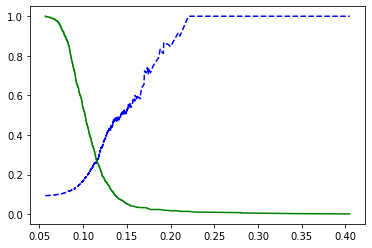

In [91]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
[...]
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


## Cutoff to maximize ROC AUC

In [92]:
def cutoff_youdens_j(fpr,tpr,thresholds):
  a = tpr-fpr
  b = sorted(zip(a,thresholds))
  return b[-1][1] 

In [93]:
fpr, tpr, threshold = metrics.roc_curve(y_valid, y_pred_valid)

## Cutoff to maximize F1 Score

In [94]:
def f1_cutoff(precisions, recalls, thresholds):
  a=precisions*recalls/(recalls+precisions)
  b = sorted(zip(a,thresholds))
  return b[-1][1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_prob)
#y_valid, y_pred_valid

In [95]:
cutoff = cutoff_youdens_j(fpr, tpr, threshold)
cutoff

0.10229076906071098

In [96]:
cutoff_f1=f1_cutoff(precisions, recalls, thresholds)
cutoff_f1

0.11097437267455522

In [97]:
predicted = pd.DataFrame()
predicted["pred"] = y_pred_prob
predicted["pred"] = np.where(predicted["pred"] > float(cutoff), 1, 0)
predicted

pred_valid = pd.DataFrame()
pred_valid["pred"] = y_pred_valid
pred_valid["pred"] = np.where(pred_valid["pred"] > float(cutoff), 1, 0)
pred_valid

predictions = pd.DataFrame()
predictions["Loan Status"] = y_pred_test
# predictions["Loan Status"] = np.where(predictions["Loan Status"] > float(cutoff), 1, 0)
predictions

,Loan Status
0,0.106632
1,0.070894
2,0.110524
3,0.090608
4,0.083602
...,...
28908,0.131255
28909,0.123609
28910,0.110204
28911,0.120498


In [ ]:
conf_matrix = metrics.confusion_matrix(y_train, predicted)
print(conf_matrix)

acc_train = metrics.accuracy_score(y_train, predicted)
print(acc_train)
precision_train = metrics.precision_score(y_train, predicted)
print(precision_train)
sensitivity_train = metrics.recall_score(y_train, predicted)
print(sensitivity_train)
specificity_train = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])
print(specificity_train)
roc_auc_score(y_train, predicted)

[[36112 18992]
 [ 2541  3071]]
0.6453488372093024
0.13919231292208675
0.5472202423378475
0.65534262485482


0.6012814335963337

## Final log loss

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_train, y_pred_prob)

0.3049797690604191

In [ ]:
conf_matrix = metrics.confusion_matrix(y_valid, pred_valid)
print(conf_matrix)

acc_train = metrics.accuracy_score(y_valid, pred_valid)
print(acc_train)
precision_train = metrics.precision_score(y_valid, pred_valid)
print(precision_train)
sensitivity_train = metrics.recall_score(y_valid, pred_valid)
print(sensitivity_train)
specificity_train = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])
print(specificity_train)
roc_auc_score(y_valid, pred_valid)

[[3941 2177]
 [ 302  327]]
0.6325774418259967
0.13059105431309903
0.519872813990461
0.6441647597254004


0.5820187868579307

In [ ]:
log_loss(y_valid, y_pred_valid)

0.30813392129710854

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_train, predicted))
f1_score(y_valid, pred_valid)

0.22193315266485997


0.20874561123523777

In [ ]:
predictions['Loan Status'].sum()

2473.0788941416554

In [ ]:
sample=pd.read_csv('/content/drive/MyDrive/Deloitte/submission.csv')

In [ ]:
sample.head()

,Loan Status
0,0
1,0
2,0
3,0
4,0


In [ ]:
predictions.head()

,Loan Status
0,0.082574
1,0.069143
2,0.087515
3,0.076256
4,0.078822


In [ ]:
predictions.to_csv('comb.csv',index=False)